# MMM Data Generator - Example Notebook

This notebook demonstrates how to use the MMM Dataset Generator to create synthetic marketing data with known ground truth parameters for benchmarking Marketing Mix Models (MMM).

## Overview

The MMM Dataset Generator creates reproducible datasets with:
- Configurable channel patterns (linear trends, seasonal, on/off, etc.)
- Geographic regions with regional variations
- Adstock and saturation transformations
- Comprehensive ground truth information for model validation

## Table of Contents

1. [Basic Usage](#basic-usage)
2. [Using Presets](#using-presets)
3. [Custom Configurations](#custom-configurations)
4. [Data Visualization](#data-visualization)
5. [Ground Truth Analysis](#ground-truth-analysis)
6. [Multi-Region Analysis](#multi-region-analysis)
7. [Data Quality Validation](#data-quality-validation)

## Setup and Imports

In [1]:
# Import the MMM data generator
from mmm_param_recovery.data_generator import (
    generate_mmm_dataset,
    get_preset_config,
    list_available_presets,
    customize_preset,
    MMMDataConfig,
    ChannelConfig,
    RegionConfig,
    TransformConfig,
    plot_channel_spend,
    plot_channel_contributions,
    plot_roas_comparison,
    plot_regional_comparison,
    plot_data_quality,
    calculate_roas_values,
    calculate_attribution_percentages
)

# Standard data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1. Basic Usage

Let's start with the simplest usage - generating data with default configuration.

In [2]:
# Generate dataset with default configuration
print("Generating MMM dataset with default configuration...")
result = generate_mmm_dataset()

# Extract data and ground truth
data = result['data']
ground_truth = result['ground_truth']
config = result['config']

print(f"\nDataset generated successfully!")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print(f"Date range: {data['date'].min()} to {data['date'].max()}")
print(f"Regions: {data['geo'].unique()}")
print(f"\nConfiguration used:")
print(f"- Number of periods: {config.n_periods}")
print(f"- Number of channels: {len(config.channels)}")
print(f"- Number of regions: {config.regions.n_regions}")
print(f"- Seed: {config.seed}")

Generating MMM dataset with default configuration...

Dataset generated successfully!
Shape: (387, 8)
Columns: ['date', 'geo', 'x1_x-seasonal', 'x2_x-linear-trend', 'x3_x-on-off', 'c1', 'c2', 'y']
Date range: 2020-01-05 00:00:00 to 2022-06-19 00:00:00
Regions: ['geo_a' 'geo_b' 'geo_c']

Configuration used:
- Number of periods: 129
- Number of channels: 3
- Number of regions: 3
- Seed: 42


In [3]:
# Display sample of the generated data
print("Sample of generated data:")
display(data.head(10))

print("\nData types:")
print(data.dtypes)

print("\nSummary statistics:")
display(data.describe())

Sample of generated data:


,date,geo,x1_x-seasonal,x2_x-linear-trend,x3_x-on-off,c1,c2,y
0,2020-01-05,geo_a,5095.017877,3163.134082,0.000000,0.0,0.0,8129.141565
1,2020-01-12,geo_a,4465.730955,2750.415241,1542.634837,0.0,0.0,10677.975648
2,2020-01-19,geo_a,5412.340401,3300.057326,1556.055938,0.0,0.0,11066.953443
3,2020-01-26,geo_a,5595.915628,3358.464929,1527.073412,0.0,0.0,12718.008026
4,2020-02-02,geo_a,4283.754314,2470.910338,1352.010184,0.0,0.0,10461.068177
5,2020-02-09,geo_a,4743.727386,2670.133351,1482.029107,0.0,0.0,10923.331671
6,2020-02-16,geo_a,5611.476170,3109.142393,0.000000,0.0,0.0,11188.452204
7,2020-02-23,geo_a,5573.681582,2972.877148,1480.077714,0.0,0.0,10855.562197
8,2020-03-01,geo_a,5920.108873,3064.844027,1574.620784,0.0,0.0,7879.782816
9,2020-03-08,geo_a,5720.065940,2808.201489,1480.788438,0.0,0.0,15144.051081



Data types:
date                 datetime64[ns]
geo                          object
x1_x-seasonal               float64
x2_x-linear-trend           float64
x3_x-on-off                 float64
c1                          float64
c2                          float64
y                           float64
dtype: object

Summary statistics:


,date,x1_x-seasonal,x2_x-linear-trend,x3_x-on-off,c1,c2,y
count,387,387.000000,387.000000,387.000000,387.0,387.0,387.000000
mean,2021-03-28 00:00:00,6941.751463,3040.534309,1201.081563,0.0,0.0,22657.755114
min,2020-01-05 00:00:00,3676.704420,2287.678156,0.000000,0.0,0.0,7866.029025
25%,2020-08-16 00:00:00,5679.032907,2857.518852,1284.898031,0.0,0.0,15508.482958
50%,2021-03-28 00:00:00,6866.236905,3036.861067,1473.088499,0.0,0.0,22528.171116
75%,2021-11-07 00:00:00,8232.196259,3225.557168,1590.283853,0.0,0.0,28477.064958
max,2022-06-19 00:00:00,10104.838608,3973.831389,2010.625120,0.0,0.0,48132.532575
std,NaN,1504.949619,271.991555,632.851896,0.0,0.0,8408.003601


## 2. Custom Configurations

Let's create a custom configuration with specific channel patterns and transformations.

In [4]:
# Create a custom configuration with different channel patterns
custom_config = MMMDataConfig(
    n_periods=156,  # 3 years
    channels=[
        # TV with seasonal pattern
        ChannelConfig(
            name="x-TV",
            pattern="seasonal",
            base_spend=3000.0,
            seasonal_amplitude=0.6,
            seasonal_phase=0.0,
            base_effectiveness=0.7
        ),
        # Digital with linear growth
        ChannelConfig(
            name="x-Digital",
            pattern="linear_trend",
            base_spend=1500.0,
            spend_trend=0.08,  # 8% growth per period
            base_effectiveness=0.6
        ),
        # Print with delayed start
        ChannelConfig(
            name="x-Print",
            pattern="delayed_start",
            base_spend=800.0,
            start_period=10,
            ramp_up_periods=4,
            base_effectiveness=0.3
        ),
        # Social media with on/off pattern
        ChannelConfig(
            name="x-Social",
            pattern="on_off",
            base_spend=600.0,
            activation_probability=0.7,
            min_active_periods=2,
            max_active_periods=6,
            base_effectiveness=0.5
        )
    ],
    regions=RegionConfig(
        n_regions=3,
        region_names=["geo_a", "geo_b", "geo_c"],
        channel_scale_variation=0.5,
    ),
    transforms=TransformConfig(
        adstock_fun="geometric_adstock",
        adstock_kwargs=[{"alpha": 0.6}, {"alpha": 0.3}, {"alpha": 0}, {"alpha": 0.1}],
        saturation_fun="hill_function",
        saturation_kwargs={"slope": 0.5, "kappa": 0.8}
    ),
    seed=42
)

print("Generating data with custom configuration...")
custom_result = generate_mmm_dataset(custom_config)
custom_data = custom_result['data']
custom_ground_truth = custom_result['ground_truth']

print(f"\nCustom dataset generated!")
print(f"Shape: {custom_data.shape}")
print(f"Channels: {[col for col in custom_data.columns if col.startswith('x')]}")
print(f"Regions: {custom_data['geo'].unique()}")

Generating data with custom configuration...

Custom dataset generated!
Shape: (468, 7)
Channels: ['x1_x-TV', 'x2_x-Digital', 'x3_x-Print', 'x4_x-Social']
Regions: ['geo_a' 'geo_b' 'geo_c']


## 4. Data Visualization

Let's visualize the generated data using the built-in plotting functions.

Plotting channel spend patterns...


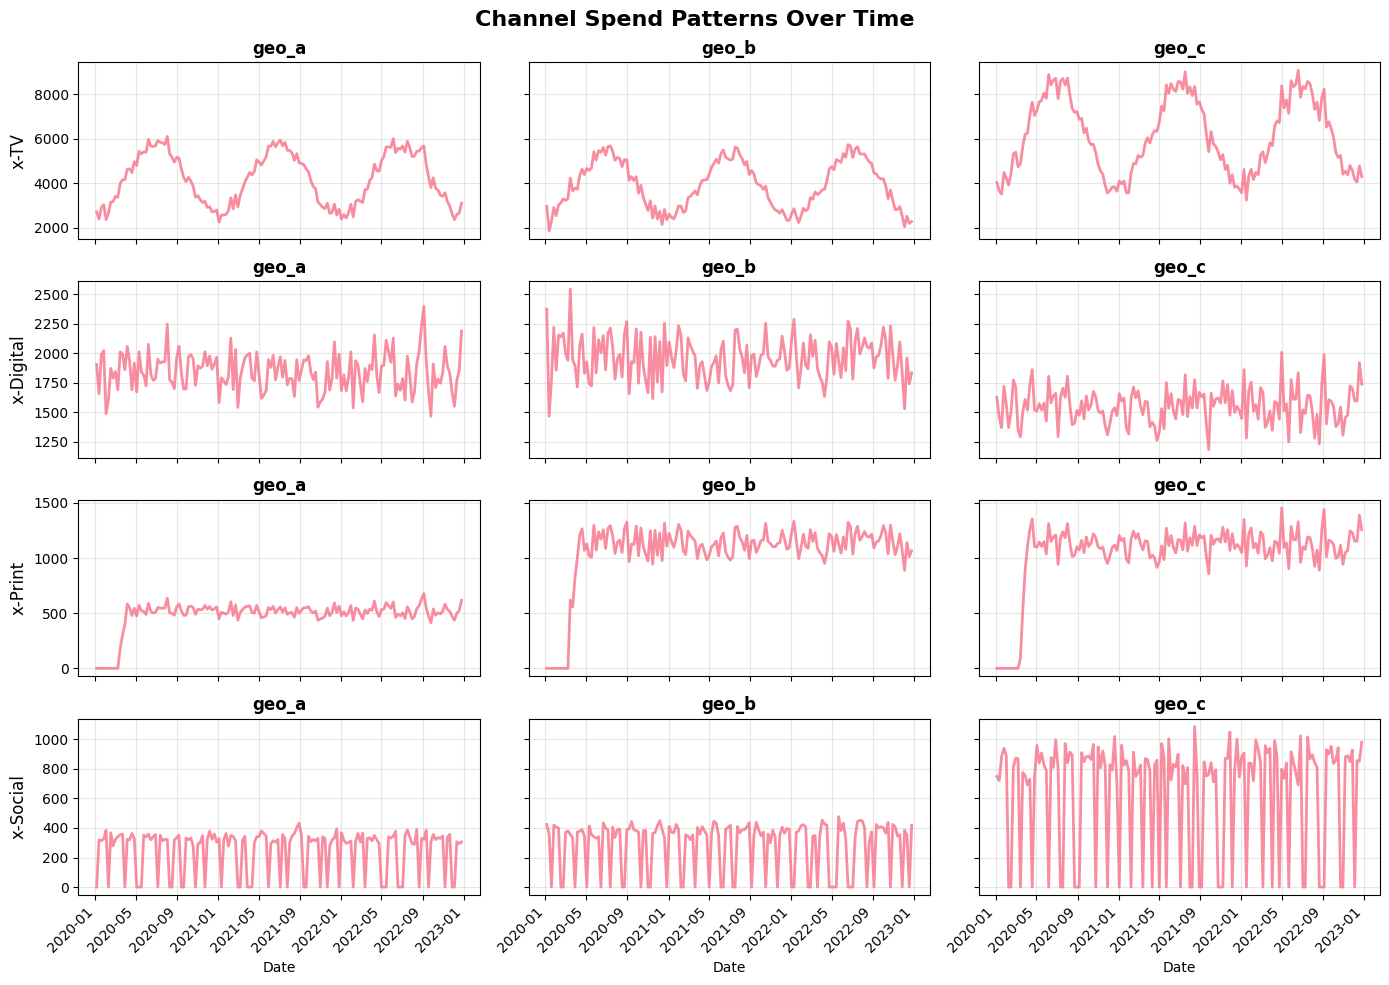

In [5]:
# Plot channel spend patterns
print("Plotting channel spend patterns...")
fig = plot_channel_spend(
    custom_data,
    figsize=(14, 10),
    style="line"
)
plt.suptitle('Channel Spend Patterns Over Time', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Plotting channel contributions...


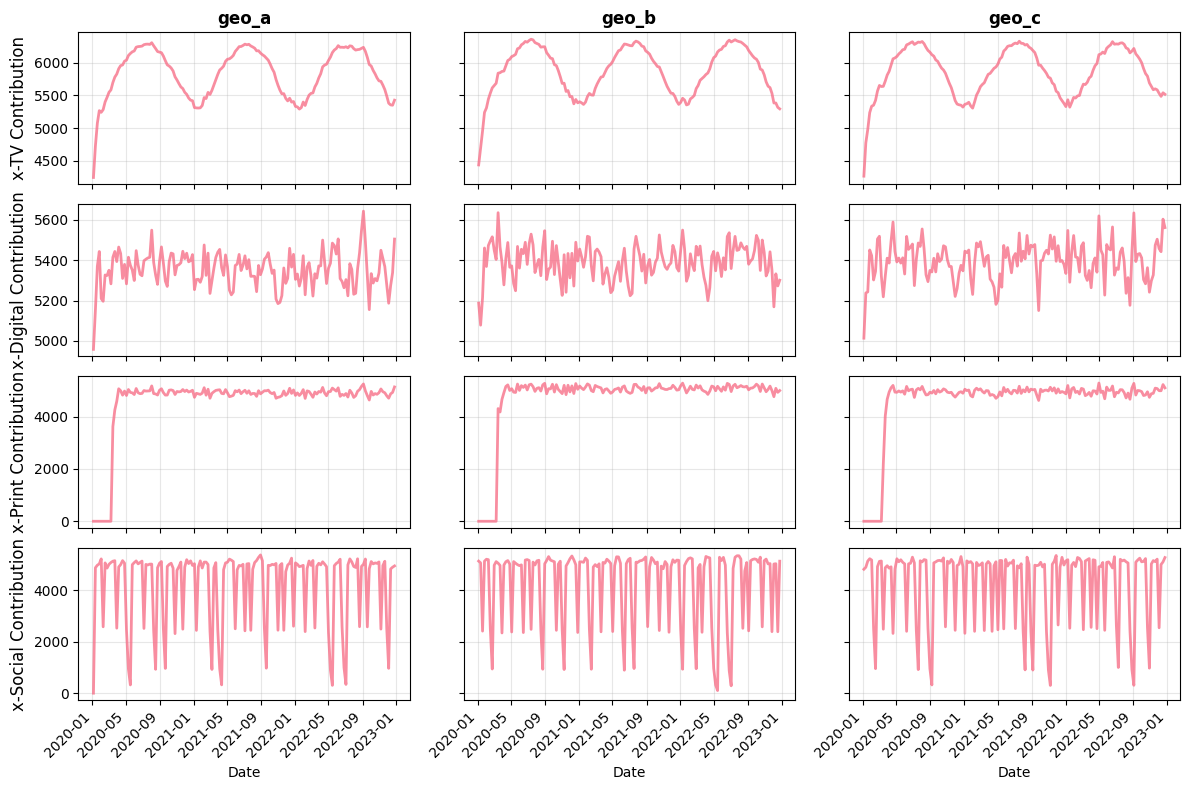

In [6]:
# Plot channel contributions (placeholder for now)
print("Plotting channel contributions...")
fig = plot_channel_contributions(custom_result['ground_truth']['transformed_spend'].reset_index())
plt.show()

Plotting ROAS comparison...


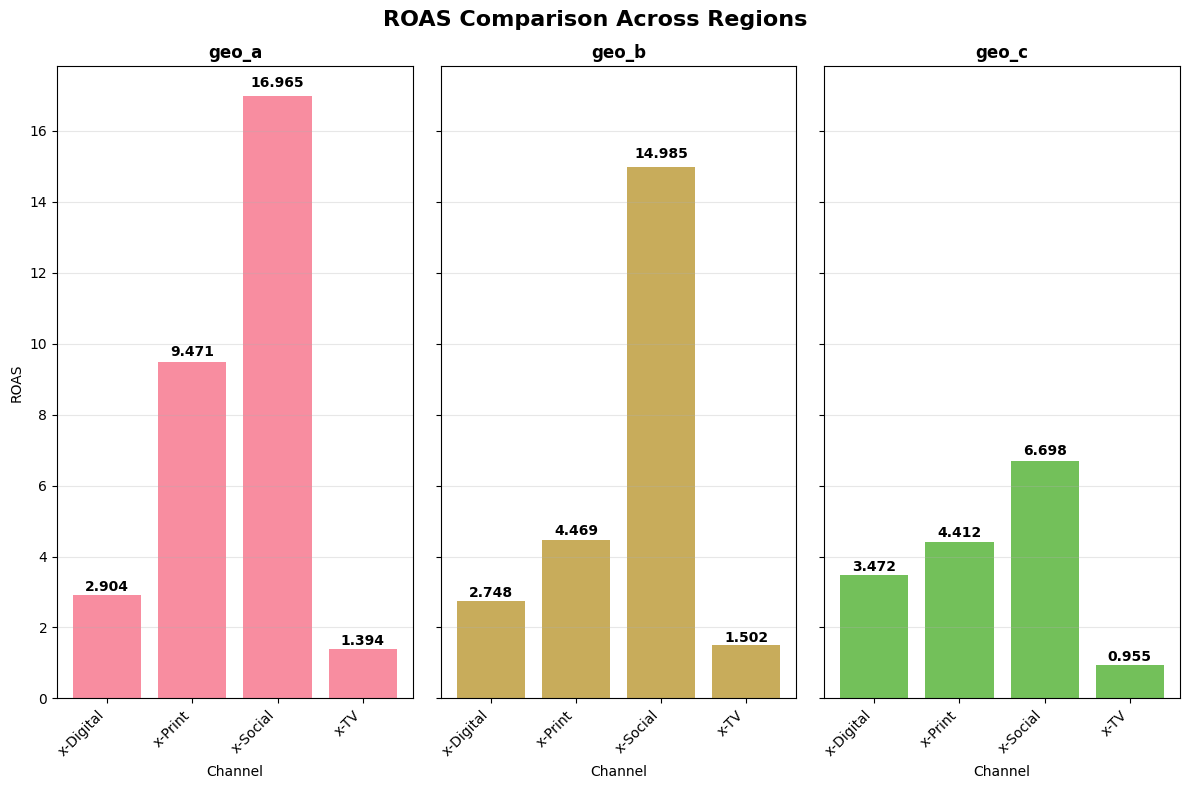

In [7]:
# Plot ROAS comparison (placeholder for now)
print("Plotting ROAS comparison...")
fig = plot_roas_comparison(custom_ground_truth)
plt.show()

## 5. Ground Truth Analysis

Let's examine the ground truth information that comes with the generated data.

In [8]:
# Examine ground truth structure
print("Ground truth keys:")
for key in custom_ground_truth.keys():
    print(f"- {key}")

# Look at transformation parameters
print("\nTransformation parameters:")
transformation_params = custom_ground_truth['transformation_parameters']
for channel, params in transformation_params.items():
    print(f"\n{channel}:")
    for param_name, param_value in params.items():
        print(f"  {param_name}: {param_value}")

Ground truth keys:
- transformation_parameters
- baseline_components
- roas_values
- attribution_percentages
- transformed_spend

Transformation parameters:

channels:
  x-TV: {'geo_a': {'adstock_function': 'geometric_adstock', 'adstock_params': {'alpha': 0.6}, 'saturation_function': 'hill_function', 'saturation_params': {'slope': 0.49623620356542086, 'kappa': 0.821634286707676}}, 'geo_b': {'adstock_function': 'geometric_adstock', 'adstock_params': {'alpha': 0.6}, 'saturation_function': 'hill_function', 'saturation_params': {'slope': 0.5083891743671124, 'kappa': 0.8058131725705178}}, 'geo_c': {'adstock_function': 'geometric_adstock', 'adstock_params': {'alpha': 0.6}, 'saturation_function': 'hill_function', 'saturation_params': {'slope': 0.5034660758117834, 'kappa': 0.8018510442930588}}}
  x-Digital: {'geo_a': {'adstock_function': 'geometric_adstock', 'adstock_params': {'alpha': 0.3}, 'saturation_function': 'hill_function', 'saturation_params': {'slope': 0.49623620356542086, 'kappa': 0.

In [9]:
# Examine baseline components
print("Baseline components structure:")
baseline_components = custom_ground_truth['baseline_components']
print(f"Type: {type(baseline_components)}")
if isinstance(baseline_components, pd.DataFrame):
    print(f"Shape: {baseline_components.shape}")
    print(f"Columns: {list(baseline_components.columns)}")
    print("\nSample baseline data:")
    display(baseline_components.head())

Baseline components structure:
Type: <class 'pandas.core.frame.DataFrame'>
Shape: (468, 4)
Columns: ['base_sales', 'trend', 'seasonal', 'baseline_sales']

Sample baseline data:


,,base_sales,trend,seasonal,baseline_sales
date,geo,,,,
2020-01-05,geo_a,9749.080238,0.000000,0.000000,8123.108965
2020-01-12,geo_a,9749.080238,194.981605,235.024353,10666.006120
2020-01-19,geo_a,9749.080238,389.963210,466.621523,11049.577739
2020-01-26,geo_a,9749.080238,584.944814,691.414299,12696.645599
2020-02-02,geo_a,9749.080238,779.926419,906.124699,10438.768691


In [14]:
# Examine ROAS values
print("ROAS values:")
roas_values = custom_ground_truth['roas_values']
if isinstance(roas_values, dict):
    for geo, channels in roas_values.items():
        print(f"{geo}:")
        for channel, roas in channels.items():
            print(f"  {channel}: {roas:.2f}")
else:
    print(f"ROAS values type: {type(roas_values)}")
    print(roas_values)

ROAS values:
geo_a:
  x-TV: 1.39
  x-Digital: 2.90
  x-Print: 9.47
  x-Social: 16.97
geo_b:
  x-TV: 1.50
  x-Digital: 2.75
  x-Print: 4.47
  x-Social: 14.98
geo_c:
  x-TV: 0.96
  x-Digital: 3.47
  x-Print: 4.41
  x-Social: 6.70


## 6. Multi-Region Analysis

Let's generate and analyze data with multiple regions.

In [15]:
# Generate multi-region data
multi_region_config = get_preset_config('multi_region')
multi_region_result = generate_mmm_dataset(multi_region_config)
multi_region_data = multi_region_result['data']

print(f"Multi-region dataset shape: {multi_region_data.shape}")
print(f"Regions: {multi_region_data['geo'].unique()}")
print(f"Date range: {multi_region_data['date'].min()} to {multi_region_data['date'].max()}")

Multi-region dataset shape: (312, 6)
Regions: ['geo_a' 'geo_b' 'geo_c' 'geo_d']
Date range: 2020-01-05 00:00:00 to 2021-06-27 00:00:00


In [16]:
# Analyze regional variations
print("Regional analysis:")
for region in multi_region_data['geo'].unique():
    region_data = multi_region_data[multi_region_data['geo'] == region]
    print(f"\n{region}:")
    print(f"  Mean sales: {region_data['y'].mean():.2f}")
    print(f"  Sales std: {region_data['y'].std():.2f}")
    print(f"  Min sales: {region_data['y'].min():.2f}")
    print(f"  Max sales: {region_data['y'].max():.2f}")

Regional analysis:

geo_a:
  Mean sales: 17598.55
  Sales std: 5451.67
  Min sales: 9097.53
  Max sales: 31683.77

geo_b:
  Mean sales: 17068.51
  Sales std: 5205.69
  Min sales: 8234.92
  Max sales: 28101.54

geo_c:
  Mean sales: 18821.11
  Sales std: 5576.90
  Min sales: 8701.91
  Max sales: 32109.94

geo_d:
  Mean sales: 17657.21
  Sales std: 5434.07
  Min sales: 9206.73
  Max sales: 34008.16


Plotting regional comparison...


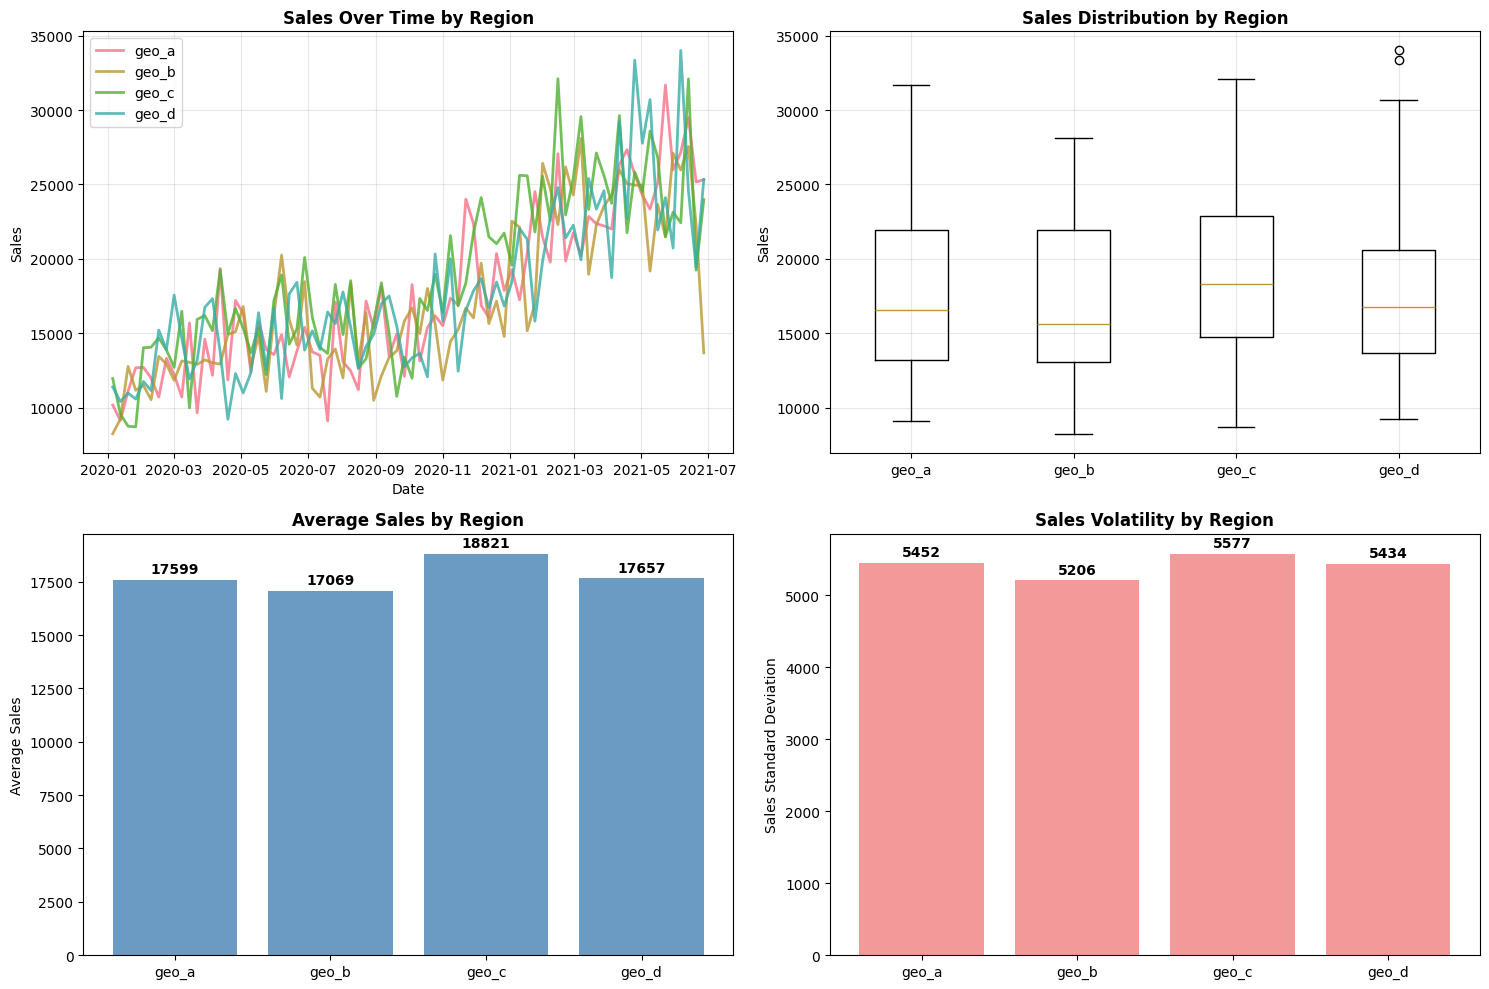

In [17]:
# Plot regional comparison (placeholder for now)
print("Plotting regional comparison...")
fig = plot_regional_comparison(multi_region_data)
plt.show()

## 7. Data Quality Validation

Let's validate the quality of our generated data.

Plotting data quality diagnostics...


/home/teemu/pymc-labs/mmm-param-recovery/mmm_param_recovery/data_generator/visualization.py:737: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


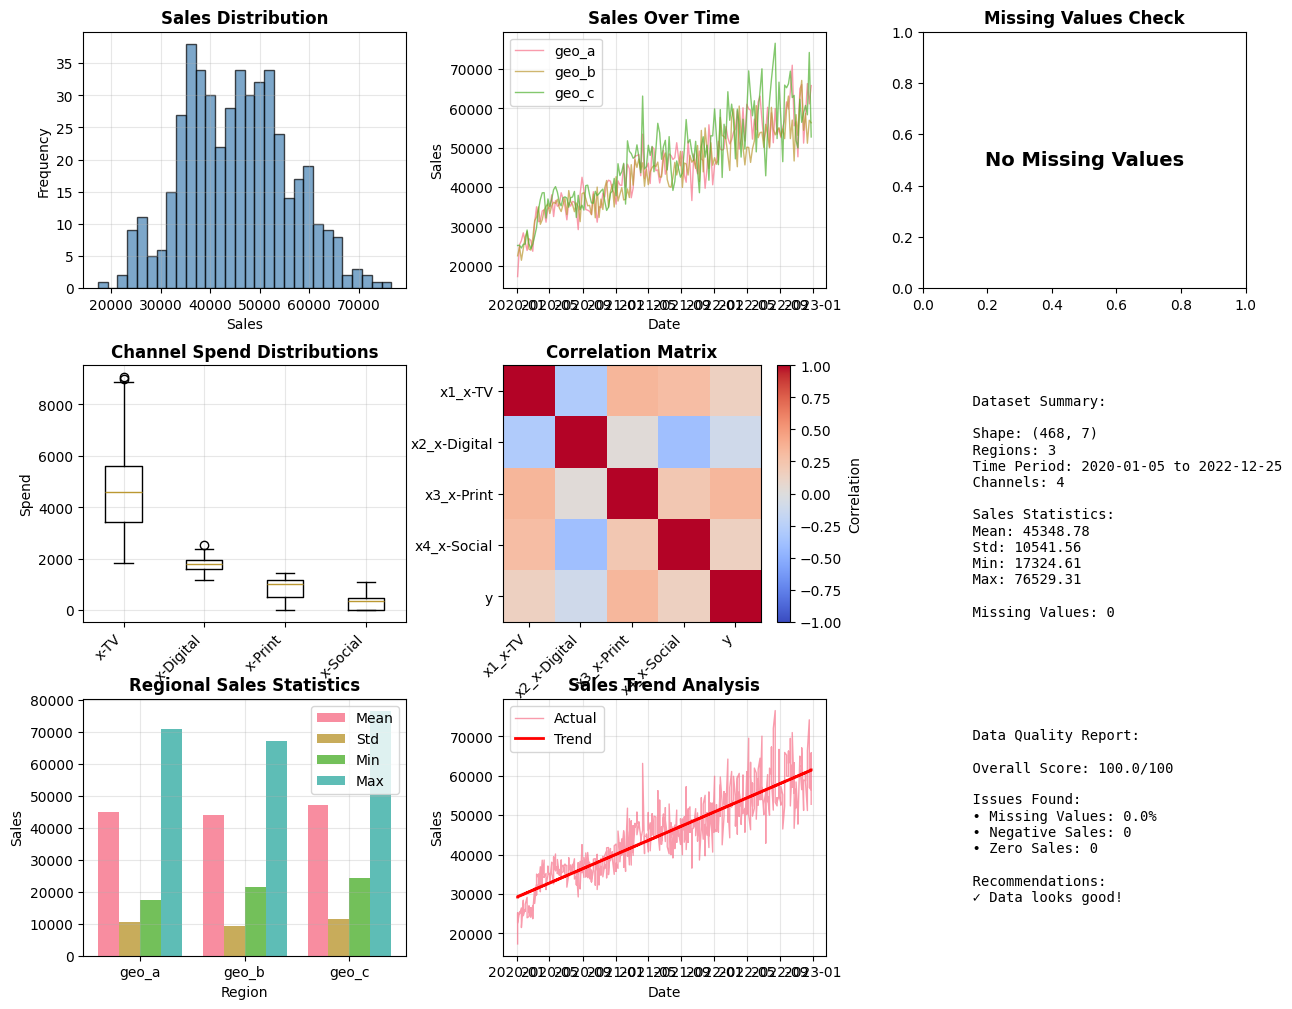

In [18]:
# Plot data quality diagnostics (placeholder for now)
print("Plotting data quality diagnostics...")
fig = plot_data_quality(custom_data)
plt.show()

In [19]:
# Manual data quality checks
print("Manual data quality checks:")

# Check for missing values
missing_values = custom_data.isnull().sum()
print(f"\nMissing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

# Check for negative values in spend columns
spend_columns = [col for col in custom_data.columns if col.startswith('x')]
negative_spend = (custom_data[spend_columns] < 0).sum()
print(f"\nNegative values in spend columns:")
print(negative_spend[negative_spend > 0] if negative_spend.sum() > 0 else "No negative spend values")

# Check for duplicate date-geo combinations
duplicates = custom_data.duplicated(subset=['date', 'geo']).sum()
print(f"\nDuplicate date-geo combinations: {duplicates}")

# Check data types
print(f"\nData types:")
print(custom_data.dtypes)

Manual data quality checks:

Missing values per column:
No missing values

Negative values in spend columns:
No negative spend values

Duplicate date-geo combinations: 0

Data types:
date            datetime64[ns]
geo                     object
x1_x-TV                float64
x2_x-Digital           float64
x3_x-Print             float64
x4_x-Social            float64
y                      float64
dtype: object


## 8. Advanced Usage Examples

Let's explore some advanced usage patterns.

In [20]:
# Generate high-frequency data for digital marketing analysis
print("Generating high-frequency data...")
high_freq_config = get_preset_config('high_frequency')
high_freq_result = generate_mmm_dataset(high_freq_config)
high_freq_data = high_freq_result['data']

print(f"High-frequency dataset shape: {high_freq_data.shape}")
print(f"Date range: {high_freq_data['date'].min()} to {high_freq_data['date'].max()}")
print(f"Channels: {[col for col in high_freq_data.columns if col.startswith('x')]}")

Generating high-frequency data...
High-frequency dataset shape: (156, 7)
Date range: 2020-01-05 00:00:00 to 2022-12-25 00:00:00
Channels: ['x1_x-Paid-Search', 'x2_x-Social-Media', 'x3_x-Display', 'x4_x-Email']


In [21]:
# Generate enterprise-level data
print("Generating enterprise-level data...")
enterprise_config = get_preset_config('enterprise')
enterprise_result = generate_mmm_dataset(enterprise_config)
enterprise_data = enterprise_result['data']

print(f"Enterprise dataset shape: {enterprise_data.shape}")
print(f"Regions: {enterprise_data['geo'].unique()}")
print(f"Channels: {[col for col in enterprise_data.columns if col.startswith('x')]}")

Generating enterprise-level data...
Enterprise dataset shape: (1248, 9)
Regions: ['geo_a' 'geo_b' 'geo_c' 'geo_d' 'geo_e' 'geo_f' 'geo_g' 'geo_h']
Channels: ['x1_x-TV-National', 'x2_x-TV-Regional', 'x3_x-Digital-Display', 'x4_x-Paid-Search', 'x5_x-Social-Media', 'x6_x-Print']


In [22]:
# Compare different presets
preset_comparison = {}
presets_to_test = ['basic', 'seasonal', 'multi_region', 'digital_heavy']

for preset_name in presets_to_test:
    print(f"Generating {preset_name} preset...")
    config = get_preset_config(preset_name)
    result = generate_mmm_dataset(config)
    data = result['data']
    
    preset_comparison[preset_name] = {
        'shape': data.shape,
        'regions': len(data['geo'].unique()),
        'channels': len([col for col in data.columns if col.startswith('x')]),
        'mean_sales': data['y'].mean(),
        'sales_std': data['y'].std()
    }

print("\nPreset comparison:")
comparison_df = pd.DataFrame(preset_comparison).T
display(comparison_df)

Generating basic preset...
Generating seasonal preset...
Generating multi_region preset...
Generating digital_heavy preset...

Preset comparison:


,shape,regions,channels,mean_sales,sales_std
basic,"(52, 6)",1,3,14530.326783,3219.383748
seasonal,"(104, 6)",1,3,21213.175452,7018.121427
multi_region,"(312, 6)",4,3,17786.346002,5430.495953
digital_heavy,"(104, 8)",1,5,21944.13484,7185.810045


## 9. Summary and Next Steps

This notebook demonstrated the key features of the MMM Dataset Generator:

### ✅ What We Covered
- Basic data generation with default configuration
- Creating custom configurations with different channel patterns
- Data visualization
- Ground truth analysis and parameter examination
- Multi-region data generation and analysis
- Data quality validation
- Advanced usage with different presets

### 🚧 Future Enhancements
- More sophisticated regional variation patterns
- Additional channel patterns and transformations

### 📊 Output Schema
The generated data follows a strict schema:
- `date`: Time period for each observation
- `geo`: Geographic region
- `y`: Total sales
- `x1-*`, `x2-*`, etc.: Channel spend variables
- `c1-*`, `c2-*`, etc.: Control variables